Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [5]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 


$\quad \textbf{The problem} \\ $

As cryptocurrencies have become regulated (in the U.S. and other countries) and as institutional capital has started flowing into the cryptocurrency markets - reaching 2.904.441.786,523 USD (almost 3 trillion dollars) in market cap in January 2022 - in the past few years, the topic of crypto options trading has been ever so interesting given its votality due to highly its speculatory market.

$\quad \textbf{Goals} \\ $

In this project, my goal is to adapt the Black-Scholes model(B-S) (PDE) and the Monte Carlo Simulation (SDE) to estimate the options prices of cryptocurrencies, especifically to BTC (the project should work for any cryptocurrencies trading on the exchange of choice that I will be fetching data from - Deribit.com). One of the important points of the B-S model is that is assumes constant volatility, where are other models adapt their volatility values. As cryptocurrencies tend to be highly speculatory and change rates of volatility rapidly throughout the year it would very interesting how would it play out in real life. Nevertheless, for this project, I will attempt to adapt the B-S model which was originally developed for European options (which are a style of options contracts that can only be excercised at the time of the expiry date of the contract), and see the results it gives me in comparison to the exchange prices. I will also attempt to use the model for an assumed increase price estimation and compare it to the prices now. This I will do to simulate a trading strategy in which one belives prices will go up and uses the B-S model to see what the options prices would be in such case. I will then, adapt the Monte Carlo simulation for European options of BTC. I will finally compare both models. The Monte Carlo is interesting, personally to me, because it uses randomness to approximate results.

$\quad \textbf{Relevant background and relevant papers} \\ $

Some relevant papers and investigations that have been done regarding the estimation of options price for BTC (and other cryptocurrencies). For this project I will use a number of projects to fetch information about the processes of the B-S model, how it compares to other traditional models, and projects that have attempted the same goals I have for my projects. \
In specific, I will be using some of the code develop here for API processes and also for some calculations they do with their code in other to fit to the B-S model from: https://www.codearmo.com/python-tutorial/crypto-currency-options \
I also used this paper for reference to traditional models applied to cryptocurrencies and specially, how does the B-S comapre to other models (which according to this article, the B-S outperforms others): Molin , Elisabeth. “How Do Traditional Models for Option Valuation Perform When Applied to Cryptocurrency Options?” School of Economics and Management, LUND University, 2022, https://lup.lub.lu.se/luur/download?func=downloadFile&amp;recordOId=9074089&amp;fileOId=9074090. \
Also I used the following paper for information similar to the one provided by Molin Elisabeth: Madan, D.B., Reyners, S., & Schoutens, W. (2019). Advanced Model Calibration on Bitcoin
Options, Digital Finance, vol. 1, no. 1, pp. 117-137
For the Monte Carlo Simulation I mostly attempt to replicate the results from: https://www.codearmo.com/blog/pricing-options-monte-carlo-simulation-python


$\quad \textbf{Equations} \\ $

$\quad \textbf{The Black-Scholes Model: } \\ $
$\quad\quad$ Call option price formula: $ \\ $
$$
C = N(d_1)S_t - N(d_2)Ke^{-rt} \\
$$
$\quad\quad$ where: 
$\newline$ 
$$ 
d_1 = \frac{ln\frac{S_t}{K}+(r+\frac{\sigma ^2}{2})t}{\sigma\sqrt{t}} ,\quad and
$$
\
$$
d_2 = d_1 - \sigma\sqrt{t} 
$$ 
        
$\quad\quad$ where:  $ \\$
$\quad\quad\quad C$ = call option price 
$\newline$ $\quad\quad\quad N$ = CDF of the normal distribution
$\newline$ $\quad\quad\quad S_t$ = spot price of an asset
$\newline$ $\quad\quad\quad K$ = strike price
$\newline$ $\quad\quad\quad r$ = risk-free interest rate 
$\newline$ $\quad\quad\quad t$ = time to maturity
$\newline$ $\quad\quad\quad \sigma$ = volatility of asset

For cryptocurrencies, however, the formula changes a bit. \
For calls we have:

$\newline$ 
$$ 
C = FN(d_1)-N(d_2)K
$$
\
$\quad\quad$ where:  $ \\$
$\quad\quad\quad C$ = call option price 
$\newline$ $\quad\quad\quad F$ = F is the currency (BTC price)
$\newline$ $\quad\quad\quad d1$ = is the d1 formula described above
$\newline$ $\quad\quad\quad d2$ = is the d2 formula described above
$\newline$ $\quad\quad\quad N$ = CDF of the normal distribution
$\newline$ $\quad\quad\quad K$ = strike price

and for puts:
$$
P = N(-d_2)K-N(-d_1)F
$$ 

$\quad\quad$ where:  $ \\$
$\quad\quad\quad P$ = put option price 
$\newline$ $\quad\quad\quad F$ = F is the currency (BTC price)
$\newline$ $\quad\quad\quad d1$ = is the d1 formula described above
$\newline$ $\quad\quad\quad d2$ = is the d2 formula described above
$\newline$ $\quad\quad\quad N$ = CDF of the normal distribution
$\newline$ $\quad\quad\quad K$ = strike price



I say that this change becuase the interest rates for BTC are set to 0 in contrast to fiat options.


$\quad \textbf{The Monte Carlo Model: } \\ $

For the Monte Carlo option pricing formula, one usually finds:
$$
S_t = S_{t-\Delta t}e^{(r-\delta-\frac{\sigma ^2}{2})(\Delta t)+ \sigma \epsilon \sqrt{\delta t}} \\
$$

However, to follow the literature describe above, we will take one step back to derivation of the final conventional formula just described and have: 

$$
ln(S_T) - ln(S_0) = (\mu - \frac{\sigma ^2}{2}T+\sigma\sqrt{T})
$$

where:

$\mu = r - \delta$

We would now get:

$$
S_T=S_0 e^{(\mu-\frac{\sigma ^2}{2}dt+\sigma dW(t)}
$$

to then get:

$$
ln(S_T) = ln(S_0)+ [\int_0^t(\mu - \frac{\sigma ^2}{2})dt] + [\int_0^t(\sigma dW(t)], \quad for \quad t \in [0,...,T]
$$

$\quad\quad$ where:  $ \\$
$\quad\quad\quad S_T$ = Stock at time T 
$\newline$ $\quad\quad\quad S_0$ = Current stock price
$\newline$ $\quad\quad\quad \mu (r - \delta)$ = expected return
$\newline$ $\quad\quad\quad \sigma $ = volatility
$\newline$ $\quad\quad\quad W$ = Wiener process


## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

$ \newline $ 
$\textbf{Importance of cryptocurrencies and its option markets} \newline$ 
More than  100 million dollars of Bitcoin options were traded daily in 2020. As the market capitalization has continued to increase since 2020, it could be expected 
that more of these options are traded in the cryptocurrency markets. $ \newline $
$\textbf{Why is it important for me} \newline$ 
The topic of cryptocurrencies trading in general is important for me becuase I enter the cryptocurrencies market in 2015, and I have been trading ever since. Options, specifically is something that I have never traded and something I am eager to learn about. I would like to learn how does it compare to futures trading.$ \newline $
$\textbf{Why Bitcoin?} \newline$ 
Bitcoin has the largest market capitalization of all the cryptocurrencies and has been officialized in countries like el Salvador, and many large companies 
have started adopting bitcoin as a method of payment, in contrast to the majority of the other cryptocurrences. Additionally, cryptocurrencies trading seems to 
be somewhat more complicated that regular trading of securities, bonds, options, etc., becuase the market never closes, and is available everywhere in the world where there is internet, no need to set up and send lengthy information to brokers, have dollars, and a number of other steps required for traditional markets. More concisely, it is available to everyone with an internet connection all over the world and not just a group of people who have access to banking. $ \newline $
$\textbf{Why the Black-Scholes and Monte Carlo?} \newline$ 
The Black-Scholes Model is very important becuase it seems to have served as a promotional model for option (European options in specific), as it seems to have been the first 
model to estimate option prices. However, I foresee some problems with the B-S model as, in my view, since it assumes volatility to be constant this may be weakness as bitcoin and the cryptocurrency markets has yet to undergo through more robust regulation in many countries still. With anyone being able to buy and sell, manipulation and speculation has played a big role in the movements of the markets making it a very volatile one.
I chose to Compare to the Monte Carlo, because are stocks are said to follow Geometric Brownian motion, and from what I have read the Monte Carlo simulation is good for and very interesting for me is that it uses Randomness to calculate results. In this project I will attempt to look at convergence with the B-S model.


## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



First off, I will compute Bitcoin (BTC) option prices with the Black-Scholes model (BS) and fetch data from Deribit.com, the largest cryptocurrencies option trading platform.
To do so, I will develop the BS model in the first code cell in the implemention cell. I will use a class I have found in https://www.codearmo.com/python-tutorial/crypto-currency-options which allows me to fetch data from Deribit. I have put said class in a different file called dataclass.py
Then I will compute the BTC option prices using the Heston model and fetch data from Deribit.com as well.  
To get data from Deribit.com, I am using a class that I have imported from https://www.codearmo.com/python-tutorial/crypto-currency-options
After I have computed both (for historical data in contrast to current contracts), I will compare the results they have given with how the options markets reacted and will see which model is more accurate in estimating option prices.

In [6]:
# Provide complete installation or import information for external packages or modules here e.g.

!pip install --user websockets
!pip install nest-asyncio
# from somepackage import blah

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

As described above, first I will develop the routine for the BS model. 


In [15]:
from scipy.stats import norm
from datetime import datetime, date
from pandas import DataFrame
from dataclass import DeribitOptionsData
import nest_asyncio
nest_asyncio.apply()

# These are d1, and d2 from the formulas Problem description seccion
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

# This is for the CDF of the normal distribution
N = norm.cdf

# These are the call and put from the formulas in the Problem description seccion
def BS_CALL(S, K, T, r, sigma):
    d1 = (numpy.log(S/K) + (r + sigma**2/2)*T) / (sigma*numpy.sqrt(T))
    d2 = d1 - sigma * numpy.sqrt(T)
    return S * N(d1) - K * numpy.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (numpy.log(S/K) + (r + sigma**2/2)*T) / (sigma*numpy.sqrt(T))
    d2 = d1 - sigma* numpy.sqrt(T)
    return K*numpy.exp(-r*T)*N(-d2) - S*N(-d1)
 
optionObject = DeribitOptionsData('BTC')
exp = optionObject.expiries()

calls = optionObject.get_side_exp('Call', exp[-2])
calls = calls[calls.dollar_mid >0]
calls['Bs_price'] = BS_CALL(calls.underlying_price, calls.strike, calls.time, calls.interest_rate, 0.8303)
vols_a = []
for row in calls.itertuples():
    sigma = optionObject.option_info(row.instrument_name)['result']['ask_iv'] / 100
    V = BS_CALL(row.underlying_price, row.strike , row.time, 0, float(sigma))
    vols_a.append(sigma)
    print('-'*50)
    print(f'By Black Scholes calculation: {V}')
    print(f'From API call (Deribit)     : {row.dollar_ask}')
    print('STRIKE                      :', row.strike)

calls['implied_vol_ask'] = vols_a

--------------------------------------------------
By Black Scholes calculation: 10255.773861467584
From API call (Deribit)     : 10262.149865000001
STRIKE                      : 25000
--------------------------------------------------
By Black Scholes calculation: 380.11839852478806
From API call (Deribit)     : 382.34537500000005
STRIKE                      : 100000
--------------------------------------------------
By Black Scholes calculation: 2394.770682177249
From API call (Deribit)     : 2401.091275
STRIKE                      : 50000
--------------------------------------------------
By Black Scholes calculation: 60.563628589931795
From API call (Deribit)     : 61.1743
STRIKE                      : 250000
--------------------------------------------------
By Black Scholes calculation: 45.37664218893204
From API call (Deribit)     : 45.880725000000005
STRIKE                      : 300000
--------------------------------------------------
By Black Scholes calculation: 944.2342213

Now I will see use the B-S model to estimate the option prices if the underlying asset (BTC) where to increase by 100 usd and the volatility by 10% accorss all strikes

In [9]:
calls['new_F'] = calls.underlying_price + 100 
calls['E_vol'] = calls.implied_vol_ask + 0.1
calls['expected_price'] = BS_CALL(calls.new_F, calls.strike, calls.time, 
                             calls.interest_rate, calls.E_vol) 
calls[['expected_price', 'dollar_ask']].head(30)

,expected_price,dollar_ask
24,11034.947681,10178.627850
41,708.094032,366.797400
69,3200.748497,2323.050200
78,150.854231,61.135100
105,116.480177,45.851325
107,1486.458171,901.742725
115,10482.558981,9598.210700
157,215.541487,91.702650
160,337.312796,152.837750
175,5048.941598,4050.200375


Now i will do the same but assuming that the underlying asset will decrease in its price by 100 usd and the its volatilty will also increased by 10$

In [10]:
calls['new_F'] = calls.underlying_price - 100 
calls['E_vol'] = calls.implied_vol_ask + 0.1 
calls['expected_price'] = BS_CALL(calls.new_F, calls.strike, calls.time, 
                             calls.interest_rate, calls.E_vol) 
calls[['expected_price', 'dollar_ask']].head(30)

,expected_price,dollar_ask
24,10887.157592,10178.627850
41,689.950666,366.797400
69,3134.464513,2323.050200
78,146.828724,61.135100
105,113.378438,45.851325
107,1451.024497,901.742725
115,10338.448909,9598.210700
157,209.813929,91.702650
160,328.378911,152.837750
175,4956.009358,4050.200375


Now lets develop the Monte Carlo simulation for options prices

Text(0.5, 1.0, 'Geometric Brownian Motion')

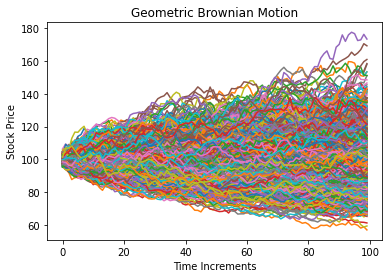

In [12]:
# this function and example can be found in the cited literature described in Problem description
def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current currency(stock) Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = numpy.log(S) +  numpy.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*numpy.sqrt(dt) * \
                              numpy.random.normal(size=(steps,N))),axis=0)
    
    return numpy.exp(ST)

# As shown in the literature, this will plot a graph to show the brownian motion with the dummy data input,
# this is just to show the motion, we will later compare to Black-Scholes

St = 100 #stock price S_{0}
Ke = 110 # strike
Ti = 1/2 # time to maturity
ri = 0.05 # risk free risk in annual %
qu = 0.02 # annual dividend rate
sigmas = 0.25 # annual volatility in %
steps = 100 # time steps
Nu = 1000 # number of trials

paths= geo_paths(St,Ti,ri, qu,sigmas,steps,Nu)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")


Now I will compare Black-Scholes with Monte carlo

In [21]:
optionObject = DeribitOptionsData('BTC')
exp = optionObject.expiries()

calls = optionObject.get_side_exp('Call', exp[-2])
calls = calls[calls.dollar_mid >0]
calls['Bs_price'] = BS_CALL(calls.underlying_price, calls.strike, calls.time, calls.interest_rate, 0.8303)
vols_a = []
for row in calls.itertuples():
    sigma = optionObject.option_info(row.instrument_name)['result']['ask_iv'] / 100
    V = BS_CALL(row.underlying_price, row.strike , row.time, 0, float(sigma))
    paths = geo_paths(row.underlying_price, row.time, 0, 0, float(sigma), 100, 1000)
    M = numpy.mean(numpy.maximum(paths[-1]-row.strike, 0))*numpy.exp(0*row.time)
    vols_a.append(sigma)
    print('-'*50)
    print(f'By Black Scholes calculation: {V}')
    print(f'By Monte Carlo calculation  : {M}')
    print(f'From API call (Deribit)     : {row.dollar_ask}')
    print('STRIKE                      :', row.strike)

calls['implied_vol_ask'] = vols_a

--------------------------------------------------
By Black Scholes calculation: 10250.486383039208
By Monte Carlo calculation  : 10021.6850418587
From API call (Deribit)     : 10257.0367
STRIKE                      : 25000
--------------------------------------------------
By Black Scholes calculation: 380.46729285941
By Monte Carlo calculation  : 302.99403475970416
From API call (Deribit)     : 382.725125
STRIKE                      : 100000
--------------------------------------------------
By Black Scholes calculation: 2412.6872357900047
By Monte Carlo calculation  : 2171.542136923763
From API call (Deribit)     : 2418.8227899999997
STRIKE                      : 50000
--------------------------------------------------
By Black Scholes calculation: 60.60916833651811
By Monte Carlo calculation  : 69.23971766054031
From API call (Deribit)     : 61.23604
STRIKE                      : 250000
--------------------------------------------------
By Black Scholes calculation: 45.451583489053

Now, we can see a appreciable difference between the Monte Carlo, and the Black-Scholes. However, if we increase the number N of trials from 1000 to 100000 for the montecarlo, we could see and lesser difference and higher convergence from the Monte Carlo to the B-S

In [22]:
optionObject = DeribitOptionsData('BTC')
exp = optionObject.expiries()


calls = optionObject.get_side_exp('Call', exp[-2])
calls = calls[calls.dollar_mid >0]
calls['Bs_price'] = BS_CALL(calls.underlying_price, calls.strike, calls.time, calls.interest_rate, 0.8303)
vols_a = []
for row in calls.itertuples():
    sigma = optionObject.option_info(row.instrument_name)['result']['ask_iv'] / 100
    V = BS_CALL(row.underlying_price, row.strike , row.time, 0, float(sigma))
    paths = geo_paths(row.underlying_price, row.time, 0, 0, float(sigma), 100, 100000)
    M = numpy.mean(numpy.maximum(paths[-1]-row.strike, 0))*numpy.exp(0*row.time)
    vols_a.append(sigma)
    print('-'*50)
    print(f'By Black Scholes calculation: {V}')
    print(f'By Monte Carlo calculation  : {M}')
    print(f'From API call (Deribit)     : {row.dollar_ask}')
    print('STRIKE                      :', row.strike)

calls['implied_vol_ask'] = vols_a

--------------------------------------------------
By Black Scholes calculation: 10212.41721729323
By Monte Carlo calculation  : 10201.290275096631
From API call (Deribit)     : 10219.225250000001
STRIKE                      : 25000
--------------------------------------------------
By Black Scholes calculation: 379.00266102563455
By Monte Carlo calculation  : 381.8319516408762
From API call (Deribit)     : 381.31387500000005
STRIKE                      : 100000
--------------------------------------------------
By Black Scholes calculation: 2403.485360838069
By Monte Carlo calculation  : 2409.187323784166
From API call (Deribit)     : 2409.9068500000003
STRIKE                      : 50000
--------------------------------------------------
By Black Scholes calculation: 60.40295247275208
By Monte Carlo calculation  : 56.91026415426506
From API call (Deribit)     : 61.0103
STRIKE                      : 250000
--------------------------------------------------
By Black Scholes calculation

The reason why is that, as described in the cited literature for the Monte Carlo simulation, "As we increase N towards infinity the price approaches the Black-Scholes price, due to  Central Limit Theorem." 

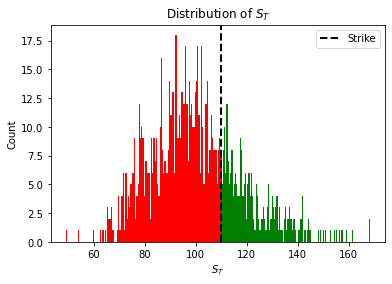

In [26]:
#visiual of Distribution of St and why as N increases to infinity it assimilates to the B-S.
paths= geo_paths(100,1/2, 0.05, 0.02, 0.25, 100, 1000) # This is with the inputted data from the first cell of the Monte-Carlo
n, bins, patches = plt.hist(paths[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


$\textbf{Why should I believe that your numerical results are correct (convergence, test cases etc)?}$ 
My methods follow the formulas given above for the model employed. An argument that I would see as valid, is the implied volatility. As deribit.com calculates volatility, that calculation could be not fully accurate for the estimation of options pricing. Nevertheless, that is a problem I personally believe the formula to have and not my methods and calculations. 
$\newline$ 
$\textbf{Did the project work (in your opinion)?} $  
It does, becuase the estimated prices by the model are very close to the prices estimated by the exchange itself implying a high level of accuracy, in my opion. \
Additionally, in my opinion, I was able to successfully use the Monte Carlo option pricing formula for Bitcoin. To do this I was set risk free and dividends variables to zero as those values go to zero with BTC as opposed to with Fiat options (usually), and I was able to compare and see the convergence of the Monte Carlo to the B-S models as the number N of trials augmented. The B-S model, however, is clearly better for estimating option prices as we can see its approximity to the prices from Deribit.com
$\newline$ 
$\textbf{If yes:  what would be the next steps to try} $   
I would love to use this model to trade. First I would use back-test data to see how my trades would perform. I would also love to compare the B-S to the Heston model (SDE), as in some of the literature cited in the Problems description section, has proven to be more effective than the B-S. (One of the literature found contrary results to this). 